<a href="https://colab.research.google.com/github/ClaudiaVizcaino/Clase_InteligenciaArtificial_RedesNeuronales/blob/main/PIA-edit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import TensorFlow

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models, Sequential
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Imagenes Train

In [31]:
train_ds = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/IA/scans/Data/train',
                                                       validation_split=0.2, #aggregar 20% de los datos de las imagenes de entrenamiento
                                                       subset="training",
                                                       seed=123, #Inicia repetibilidad
                                                       image_size=(500,500))

Found 613 files belonging to 4 classes.
Using 491 files for training.


Imagenes Validation

In [30]:
val_ds = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/IA/scans/Data/train',
                                                     validation_split=0.2,
                                                     subset="validation",
                                                     seed=123,
                                                     image_size=(500,500))

Found 613 files belonging to 4 classes.
Using 122 files for validation.


Nombres de los grupos

In [15]:
class_names = train_ds.class_names
print(class_names)

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']


Plot de Imagenes

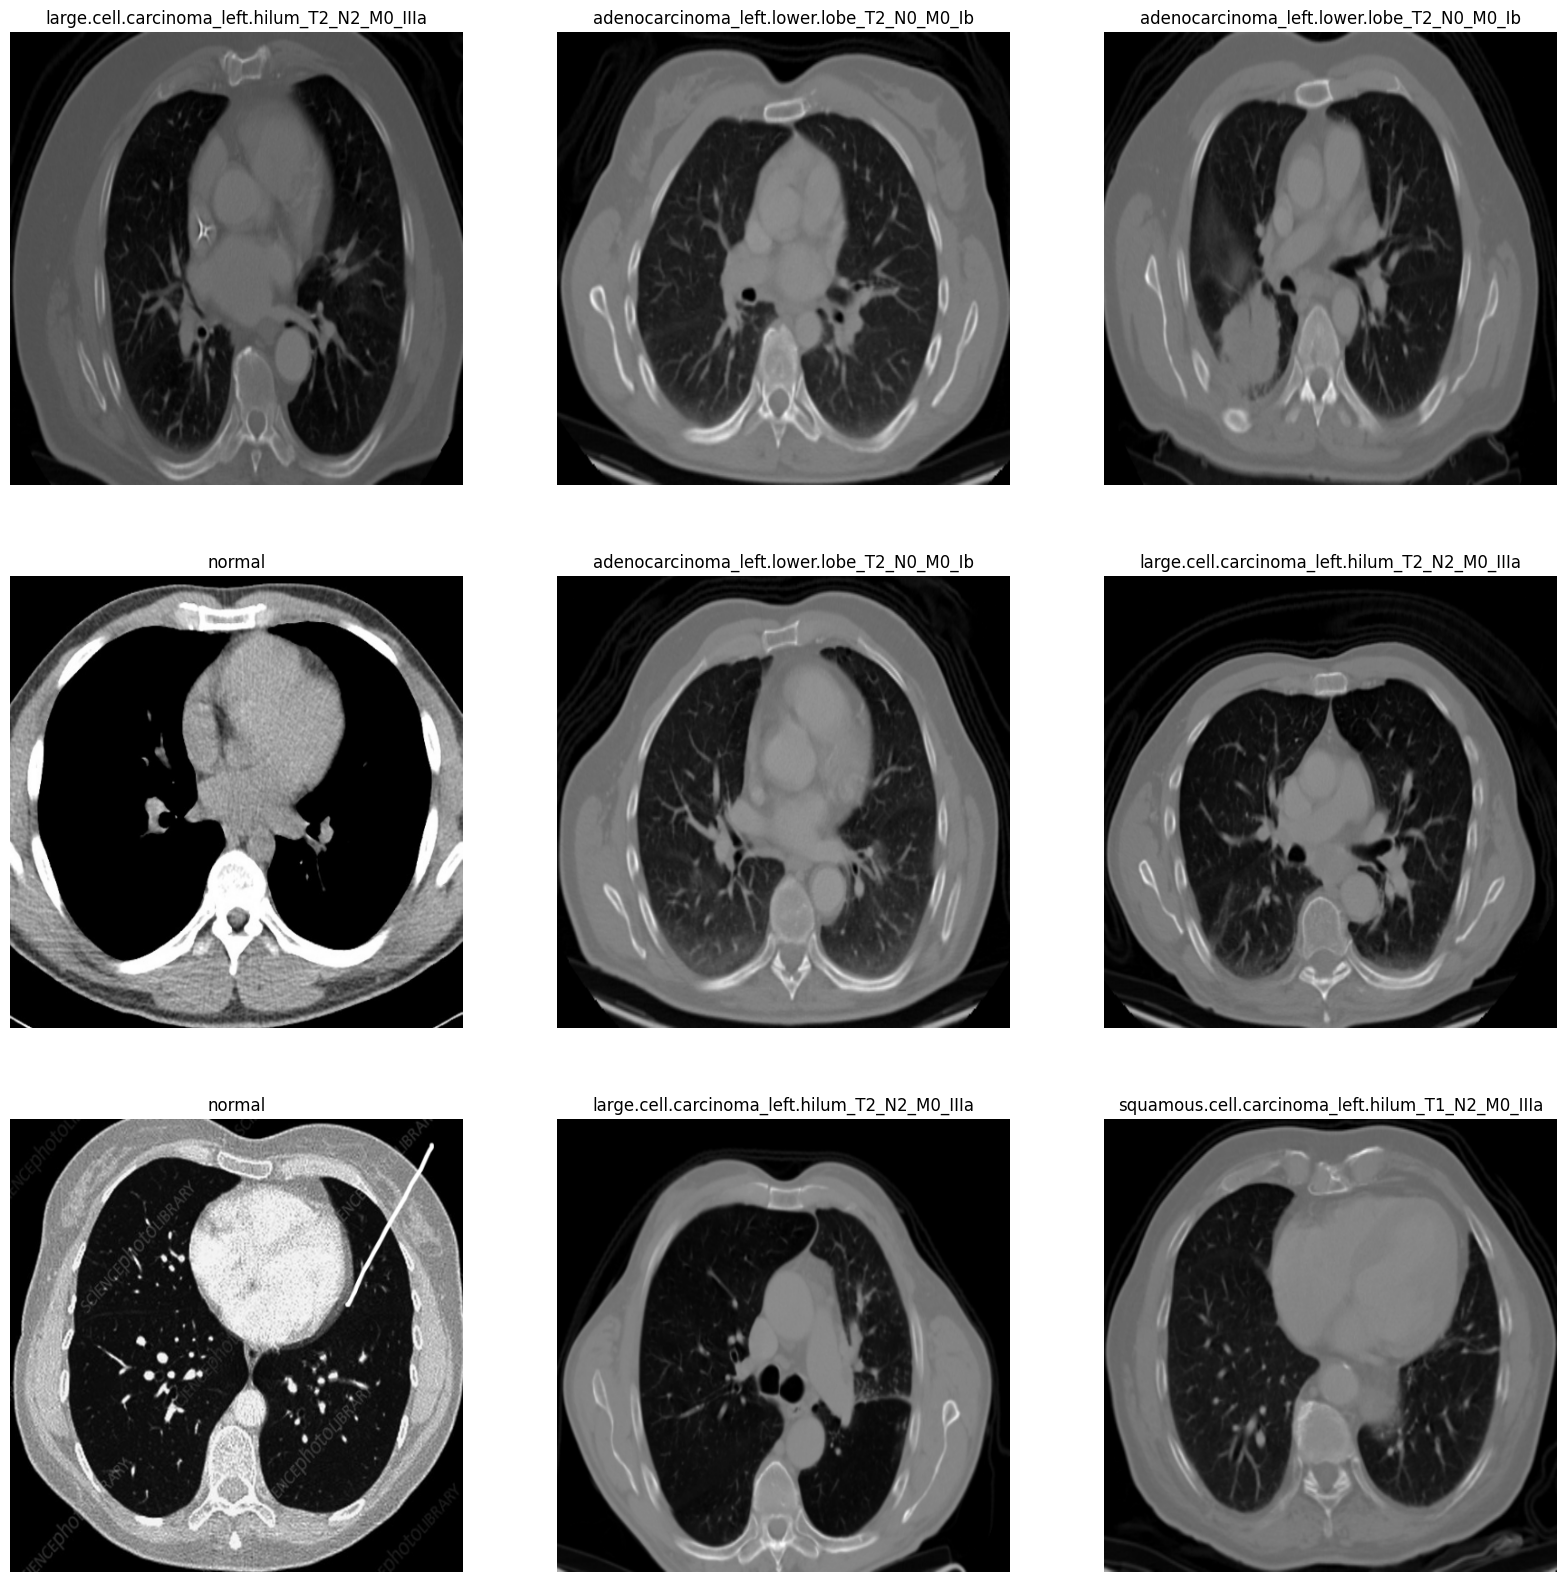

In [17]:
import matplotlib.pyplot as plt #Import matplot para graficar

plt.figure(figsize=(20,20))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Crear Base Convolucional

In [35]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 3))) #se hacen 32 filtros
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Arquitectura

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 498, 498, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 249, 249, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 247, 247, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 123, 123, 64)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 121, 121, 64)      36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

Capas densas en la parte superior

In [37]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Arquitectura

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 498, 498, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 249, 249, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 247, 247, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 123, 123, 64)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 121, 121, 64)      36928     
                                                                 
 flatten_1 (Flatten)         (None, 937024)           

Compilar y entrenar el modelo

In [41]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
epochs=4
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/4
16/16 [==============================] - 360s 22s/step - loss: 456.3058 - accuracy: 0.3198 - val_loss: 0.9902 - val_accuracy: 0.5902
Epoch 2/4
16/16 [==============================] - 356s 22s/step - loss: 0.5032 - accuracy: 0.8452 - val_loss: 0.7439 - val_accuracy: 0.7459
Epoch 3/4
16/16 [==============================] - 373s 23s/step - loss: 0.1413 - accuracy: 0.9633 - val_loss: 1.2061 - val_accuracy: 0.7213
Epoch 4/4
16/16 [==============================] - 337s 21s/step - loss: 0.0307 - accuracy: 0.9939 - val_loss: 0.7644 - val_accuracy: 0.8115


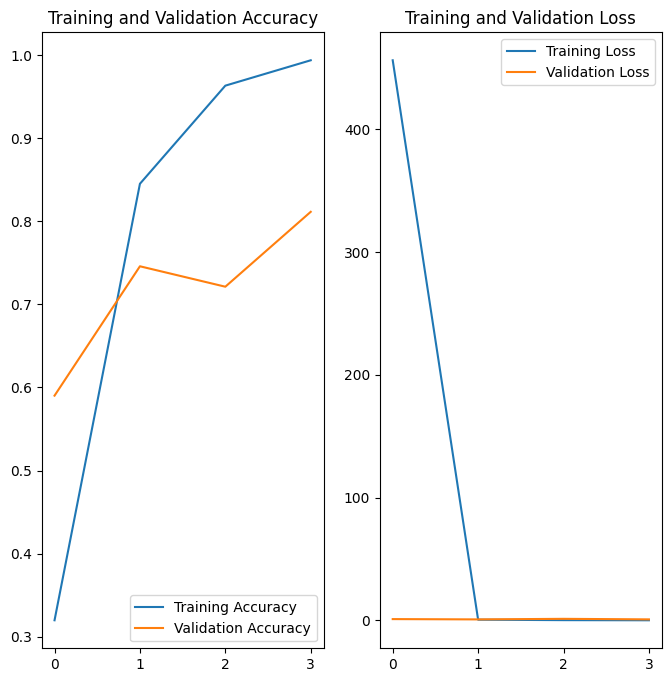

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label= 'Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
predictions = model.predict(train_ds)
predictions[0]
np.argmax(predictions[0])
labels[0]

16/16 [==============================] - 88s 5s/step


<tf.Tensor: shape=(), dtype=int32, numpy=1>